### Import data

In [8]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import G1, G2, and population data
conc_l, popl, g2l, g1l, g2_0l, g1_0l = setup_data("lapatinib");

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:29
└ @ Main /home/farnazm/dde/farnaz/DrugResponseModel.jl/src/importData.jl:29
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, ::Colon, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = get_data(::String, ::String) at importData.jl:37
└ @ Main /home/farnazm/dde/farnaz/DrugResponseModel.jl/src/importData.jl:37


### Hill model, residual functions and optimization

In [17]:
#  [EC50, b_steepness, alpha_min, alpha_max, beta_min, beta_max, tau1_mean, tau1_max, tau2_min, tau2_max, gamma1_max, gamma2_max]
# guess
guess = [150.0, 0.097836, 0.00682578, 0.00958013, 0.00503788, 0.0433964, 38.941, 9.94827, 0.00294624, 0.0222821]
# max num of steps
num_steps=10

best_fit, params = optimize_hill(guess, conc_l, g1l, g2l, g1_0l, g2_0l, num_steps)



global optimization begins ...
Starting optimization with optimizer DiffEvoOpt{FitPopulation{Float64},RadiusLimitedSelector,BlackBoxOptim.AdaptiveDiffEvoRandBin{3},RandomBound{ContinuousRectSearchSpace}}
0.00 secs, 0 evals, 0 steps

Optimization stopped after 11 steps and 3.02 seconds
Termination reason: Max number of steps (10) reached
Steps per second = 3.64
Function evals per second = 7.28
Improvements/step = 0.50000
Total function evaluations = 22


Best candidate found: [229.333, 1.01901, 0.0170631, 0.072197, 0.160587, 0.0255854, 27.7397, 5.28631, 0.0340378, 0.047301]

Fitness: 789197.208851543



(789197.2088515428, [229.3331437639707, 1.0190059203384392, 0.017063097467242154, 0.07219701167138792, 0.16058680673938924, 0.02558543569231533, 27.739680523624664, 5.286309519551733, 0.03403781251751127, 0.04730099011594482])

### Plot the data with the new set of parameters for DDE

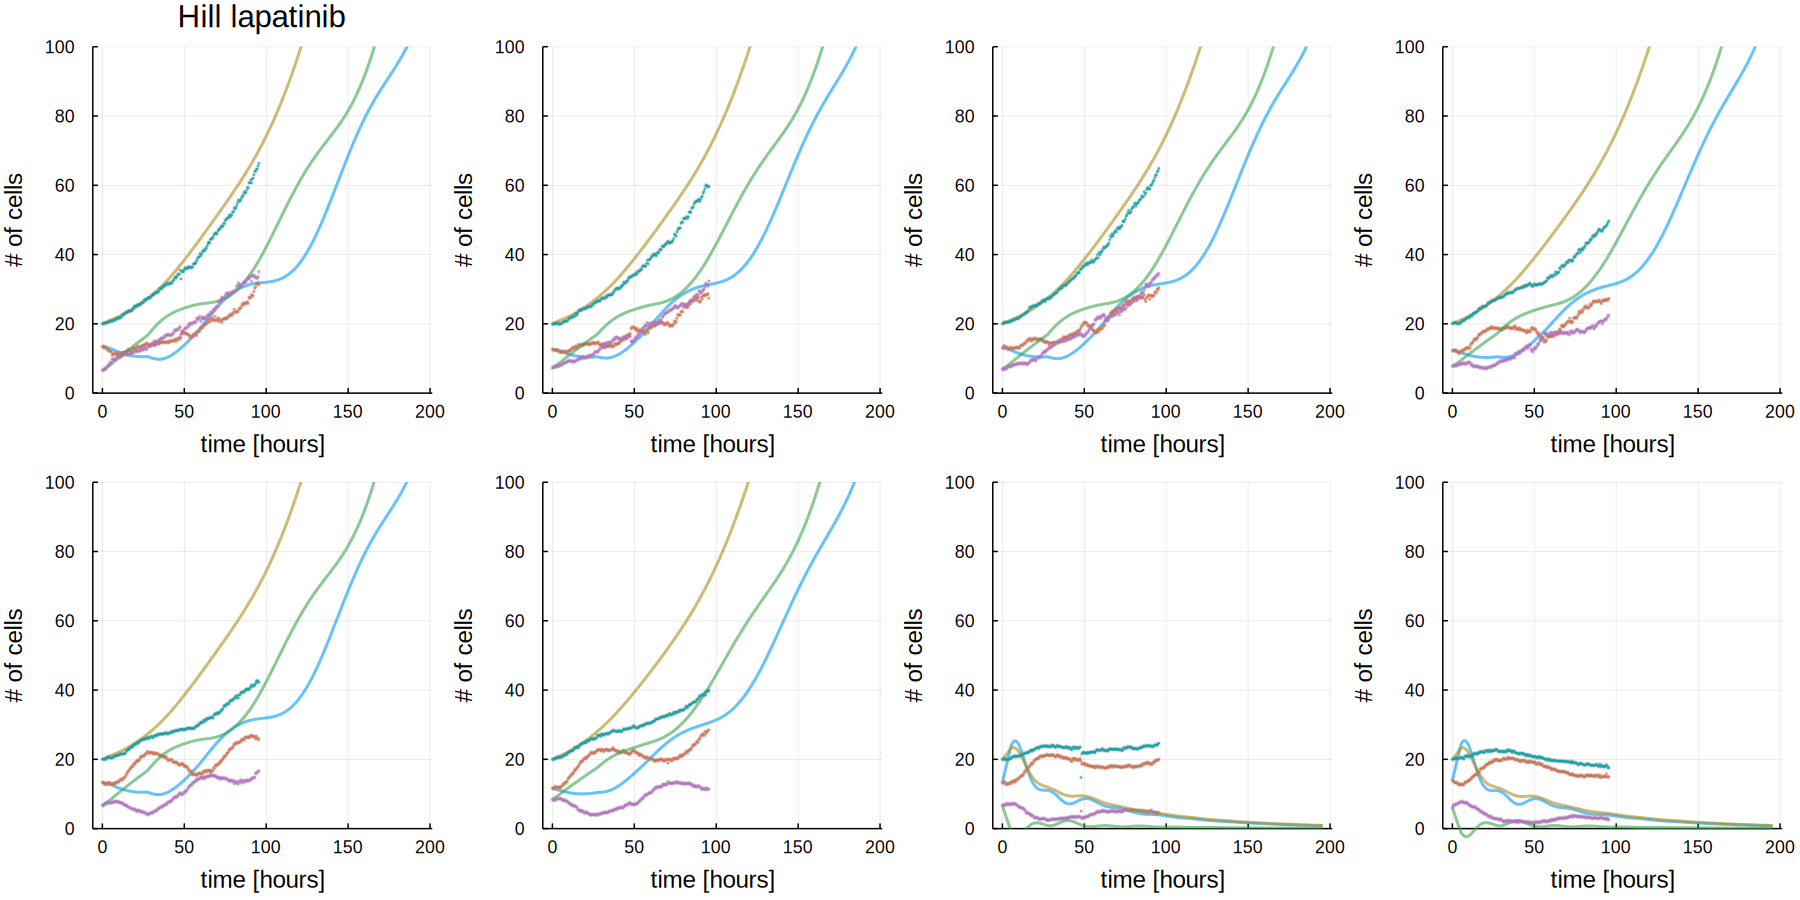

In [18]:
# easy way to convert the hill parameters to DDE parameters
p = getDDEparams(params, conc_l)
# i showas the trial number, which could be from 1:control, ..., 8: maximum drug concentraation
p_1 = plotIt(p[:, 1], 1, "Hill lapatinib", :left)
p_2 = plotIt(p[:, 2], 2, "", :false)
p_3 = plotIt(p[:, 3], 3, "", :false)
p_4 = plotIt(p[:, 4], 4, "", :false)
p_5 = plotIt(p[:, 5], 5, "", :false)
p_6 = plotIt(p[:, 6], 6, "", :false)
p_7 = plotIt(p[:, 7], 7, "", :false)
p_8 = plotIt(p[:, 8], 8, "", :false)
plot(p_1, p_2, p_3, p_4, p_5, p_6, p_7, p_8, layout = (2,4))
plot!(size = (1200, 600))
ylims!((0.0, 100.0))

### Plot Hill curve for all of the DDE model parameters

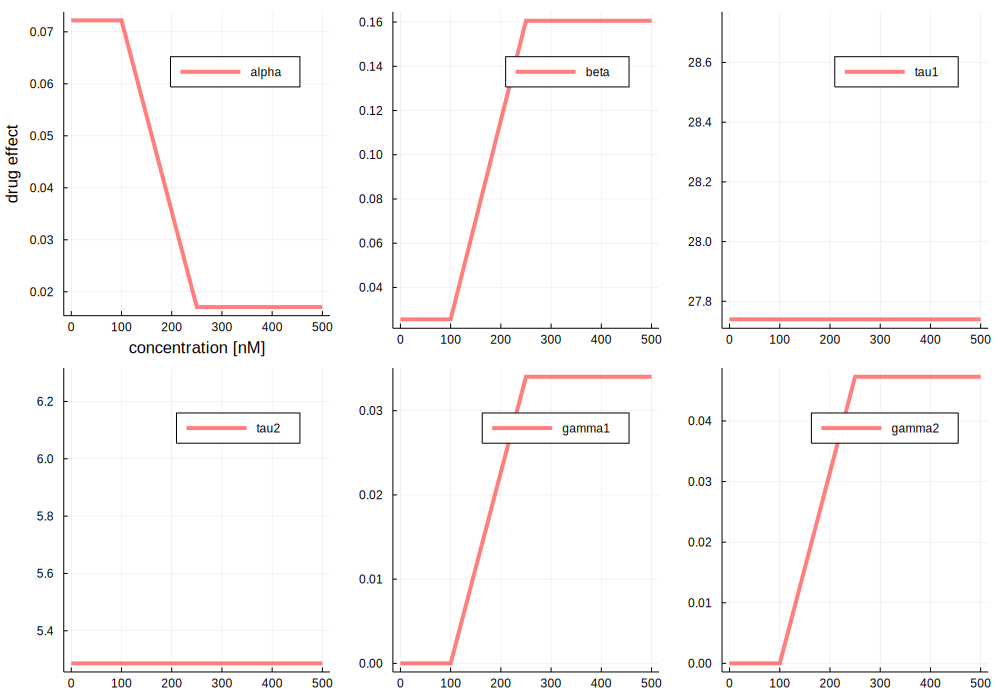

In [19]:
# plot
p__1 = plot(conc_l, p[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect", line = (0.5, 4, :red))
p__2 = plot(conc_l, p[2, :], label = "beta", linewidth = 2, legend =:best, line = (0.5, 4, :red))
p__3 = plot(conc_l, p[3, :], label = "tau1", linewidth = 2, line = (0.5, 4, :red))
p__4 = plot(conc_l, p[4, :], label = "tau2", linewidth = 2, line = (0.5, 4, :red))
p__5 = plot(conc_l, p[5, :], label = "gamma1", linewidth = 2, line = (0.5, 4, :red))
p__6 = plot(conc_l, p[6, :], label = "gamma2", linewidth = 2, line = (0.5, 4, :red))
plot(p__1, p__2, p__3, p__4, p__5, p__6)
plot!(size = (1000, 700))